# Ethereum JSON RPC usage example

In [1]:
import pandas as pd

%load_ext restmagic

pd.set_option('display.max_colwidth', -1)

In [2]:
# Helpers
hex_num = lambda v: int(v, 16)
wei_to_gwei = lambda v: v / 10 ** 9
wei_to_ether = lambda v: v / 10 ** 18

## Get latest block

In [3]:
%%rest -q
POST  https://mainnet.infura.io/
Content-Type: application/json
    
{
    "jsonrpc": "2.0",
    "method": "eth_getBlockByNumber",
    "params": ["latest", true],
    "id": 1
}

<Response [200]>

In [5]:
r = _
result = r.json()['result']
print("Latest block number: {}".format(hex_num(result['number'])))
transactions = result['transactions']

Latest block number: 6319875


In [11]:
df = pd.DataFrame(transactions, columns=['hash', 'gas', 'gasPrice', 'value'])
df['Gas limit'] = df['gas'].apply(hex_num)
df['Gas price, Gwei'] = df['gasPrice'].apply(lambda v: wei_to_gwei(hex_num(v)))
df['Value, Ether'] = df['value'].apply(lambda v: wei_to_ether(hex_num(v)))
df = df[['hash', 'Gas limit', 'Gas price, Gwei', 'Value, Ether']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2f1942400>,
      dtype=object)

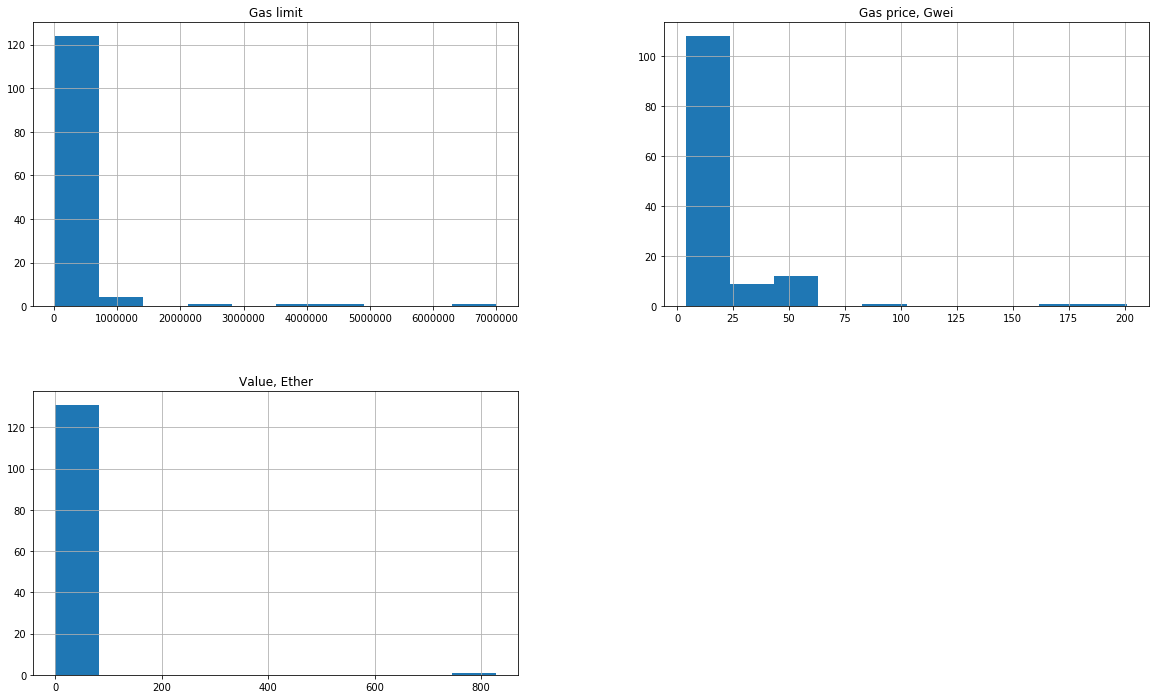

In [12]:
df.hist(figsize=(20, 12))

In [13]:
df.describe()

,Gas limit,"Gas price, Gwei","Value, Ether"
count,1.320000e+02,132.000000,132.000000
mean,2.679596e+05,18.430428,8.929126
std,8.211192e+05,26.279389,72.766633
min,2.100000e+04,4.000000,0.000000
25%,2.100000e+04,5.000000,0.000000
50%,7.306200e+04,9.800000,0.000075
75%,2.000000e+05,20.000000,0.531873
max,7.000000e+06,201.152249,828.600000


In [14]:
df = df[df['Value, Ether'] > 0]
print("Transfers, for {:.2f} Ether in total".format(df['Value, Ether'].sum()))
df

Transfers, for 1178.64 Ether in total


,hash,Gas limit,"Gas price, Gwei","Value, Ether"
3,0xb84e4ae200e30d2f53c913ca9fb2ca4af0c56581a3542ae3f3ae5a2f97a67eb7,1000000,60.000000,1.000000
5,0x498afb5c85bc6b3b0385764e80f0c17a3dc089ef173b07eb9745598fa4cd80a3,166666,50.000000,0.048989
8,0x4c722e0f5d17971e4bad50be5e85a3bea783d4e1612300a768f7135b65a5f1a4,21000,50.000000,19.990000
9,0xe4a974205de6e4aed2c12a70a0d4df94e191ecd2e72c9a1d2eb53741be32f37f,150000,50.000000,0.204087
11,0x37e0c5f2ee6b7af4fc148b607ae231ae98e7e4d1c84e457954499d26597e3056,21000,45.000000,2.299000
12,0x004fa8f527c6f38bd3251e9006c90beead706b5817e38d98777960c6a2451e4b,21000,45.000000,79.990000
13,0xaf2ef7e72098d315377fb240138cbd42a95a099907036040a02f298c8521f82f,21000,45.000000,0.758000
14,0xda2436f8ecaef7de9e641d6918d2943c219b6ff3dffebcca6bffa39de18646b6,21000,45.000000,0.057000
16,0x614bc69fa7ec2500f577c02b3254ba570049066af110af7e6595acd49dd07912,21000,41.000000,2.998278
17,0x121de042bc3315adbc66a50d54401e3a5eaf28aaf8a07237f726d5a014fff42f,21000,41.000000,1.000000
